<a href="https://colab.research.google.com/github/arjunjanamatti/finance_and_trading/blob/master/stock_trend_predicting_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#for deep learning model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/tata_global.txt', delimiter=',')
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [ ]:
# reverse the order
df = df[::-1]
df = df.reset_index(drop=True)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [ ]:
# close_price = df.iloc[:,5:6]
# train_set = close_price[:2000].values
# test_set = close_price[2000:].values
# print("Train size: ",train_set.shape)
# print("Test size:",test_set.shape)

open_price = df.iloc[:,1:2]
train_set = open_price[:2020].values
test_set = open_price[2020:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (2020, 1)
Test size: (15, 1)


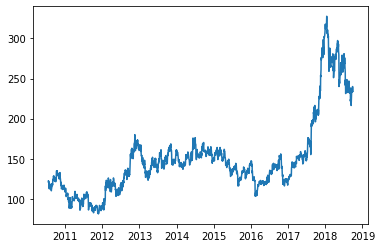

In [ ]:
dates = pd.to_datetime(df['Date'])
plt.plot_date(dates, open_price,fmt='-')

In [ ]:
x_train = []
y_train = []
sequence_length = 2
for i in range(len(train_set)):
    if (i + sequence_length) < len(train_set):
        x_train.append(train_set[i:i+sequence_length])
        y_train.append(train_set[i+sequence_length])

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2018, 2, 1)

In [ ]:
lstm_model = Sequential()

lstm_model.add(LSTM(units = 100,return_sequences=True,input_shape=(x_train.shape[1],1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units = 100,return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units = 100,return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=100))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer = 'adam',loss='mean_squared_error')
lstm_model.fit(x_train,y_train, epochs=30, batch_size =1)

Epoch 1/30
2018/2018 [==============================] - 11s 6ms/step - loss: 8327.0967
Epoch 2/30
2018/2018 [==============================] - 11s 6ms/step - loss: 2486.4324
Epoch 3/30
2018/2018 [==============================] - 12s 6ms/step - loss: 2398.7947
Epoch 4/30
2018/2018 [==============================] - 11s 6ms/step - loss: 1289.0049
Epoch 5/30
2018/2018 [==============================] - 11s 6ms/step - loss: 598.9507
Epoch 6/30
2018/2018 [==============================] - 11s 6ms/step - loss: 372.6804
Epoch 7/30
2018/2018 [==============================] - 11s 6ms/step - loss: 273.1620
Epoch 8/30
2018/2018 [==============================] - 11s 6ms/step - loss: 220.3580
Epoch 9/30
2018/2018 [==============================] - 11s 6ms/step - loss: 203.1588
Epoch 10/30
2018/2018 [==============================] - 11s 6ms/step - loss: 213.3885
Epoch 11/30
2018/2018 [==============================] - 11s 6ms/step - loss: 189.1673
Epoch 12/30
2018/2018 [=========================

In [ ]:
input = open_price[len(open_price)-len(test_set)-2:].values
input.shape
# input = sc.transform(input)


(17, 1)

In [ ]:
x_test = []
for i in range(2,15):
    x_test.append(input[i-2:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(13, 2, 1)

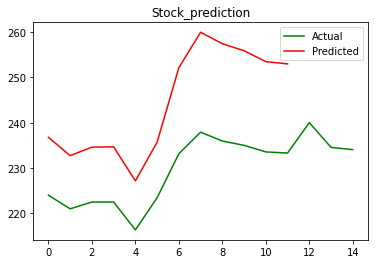

In [ ]:
pred = lstm_model.predict(x_test)
pred = pred[1:]
# # pred = sc.inverse_transform(pred)
plt.plot(test_set,color='green')
plt.plot(pred,color='red')
plt.title('Stock_prediction')
plt.legend(['Actual', 'Predicted'])
plt.show()

array([[236.77283],
       [232.72322],
       [234.60275],
       [234.66722],
       [227.15874],
       [235.69838],
       [252.11063],
       [259.9383 ],
       [257.40887],
       [255.86365]], dtype=float32)